In [1]:
import numpy as np
import matplotlib.pyplot as plt

# importing lcls surrogate model
%cd ../
from lcls_functions import Lcls
from optimizer import Opt


# import pyemittance sample eval function
from pyemittance.emit_eval_example import eval_emit_surrogate

/Users/smiskov/Documents/SLAC/emittance_opt_playground


/Users/smiskov/opt/anaconda3/envs/emit-env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/smiskov/opt/anaconda3/envs/emit-env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Initialize LCLS inj surrogate model

In [5]:
lcls = Lcls()

fn = lcls.beamsizes_list_fn
def fn_batch(x_list): return [fn(x) for x in x_list]

# define beamsize query function
def get_beamsizes_model(config, val):
    beamsizes_list = fn(config, [val])[0]
    xrms = beamsizes_list[0]
    yrms = beamsizes_list[1]
    xrms_err = xrms*0.03
    yrms_err = yrms*0.03
    return xrms, yrms, xrms_err, yrms_err

In [6]:
ref_match = -1.07999999991368 * np.asarray(
    [ 1.85240001e+00,
      -1.85240001e+00,
        1.87200002e-01,
        1.66100000e-01,
      -2.64090000e+00])

# Evaluate emittance for some injector configuration

### this example function gets the emittance for a given set of injector paramters for: SOL1, CQ1, SQ1

In [7]:
# add 5 matching quads to injector config
config_example = [0.4762182125278053, -0.00027291415901526533, -0.0017033810831913413,
                  ref_match[0], ref_match[1]*2, ref_match[2]*5, ref_match[3], ref_match[4]]

In [6]:
#eval_emit_surrogate?

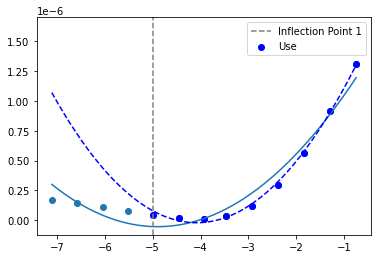

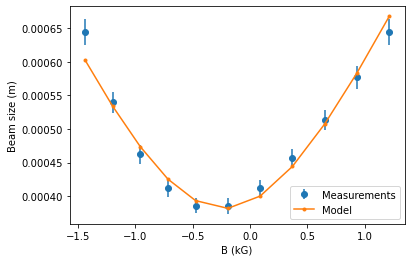

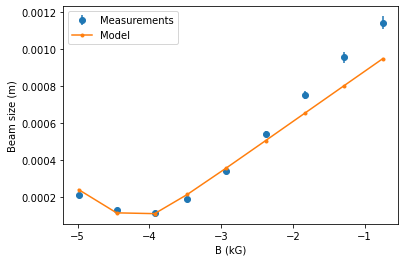

({'nemitx': 3.236989573962609e-05,
  'nemity': 5.195304704450041e-06,
  'nemitx_err': 7.311105338490874e-07,
  'nemity_err': 2.0647302472236784e-07,
  'bmagx': 1.028998293443367,
  'bmagy': 1.4517138010380561,
  'bmagx_err': 0.023241084793739403,
  'bmagy_err': 0.05769435222394099,
  'opt_q_x': -0.47400888591478413,
  'opt_q_y': -4.457677656086937,
  'quadvalsx': [-1.4396150095741744,
   -1.1982134786593268,
   -0.9568119477444792,
   -0.7154104168296317,
   -0.47400888591478413,
   -0.19237376651412863,
   0.08926135288652687,
   0.3708964722871825,
   0.6525315916878377,
   0.9341667110884931,
   1.215801830489149],
  'beamsizesx': [0.0006441959412768483,
   0.000539481989108026,
   0.0004625143192242831,
   0.0004115084302611649,
   0.0003859918797388673,
   0.00038524658884853125,
   0.0004115473129786551,
   0.00045678214519284666,
   0.0005136075196787715,
   0.000576841295696795,
   0.0006441479781642556],
  'quadvalsy': [-4.987864523975806,
   -4.457677656086937,
   -3.92749078

In [8]:
eval_emit_surrogate(
    get_bs_model=get_beamsizes_model,
    config=config_example,
    quad_init=[-8, -4, -2, 0],
    adapt_ranges=True,
    num_points=7,
    check_sym=True,
    infl_check=True,
    add_pnts=False,
    show_plots=True,
    add_noise=False,
    save_runs=False,
    calc_bmag=True,
)

In [2]:
opt = Opt()

In [3]:
opt.run_bo_opt_w_reject()